In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="custom.css">

# 日本語教育語彙表による文の難易度推定

## 発表者: 伊藤 健一

## 日本語教育語彙表

- 約18000語の日本語教育用の語彙を収録
- 作成における基礎として「現代日本語書き言葉均衡コーパス」と「日本語教科書コーパス」を利用
- 5名の日本語教師が語彙難易度を判定

レベル | 語彙例
:- | :-
初級前半 | 新しい、家、行く、今、大きい、教える、男、同じ、女、買う、書く、聞く、来る、車、子供、時間、仕事、写真、知る、好き、分かる、悪
初級後半 | 間、上げる、一緒、入れる、多い、大きな、置く、思う、顔、彼女、彼、変わる、考える、決める、気持ち、声、心、言葉、自分、女性、呼ぶ
中級前半 | 合わせる、受ける、多く、行う、返る、掛かる、形、関係、国民、情報、図、進める、中心、次、付く、続く、特に、人間、場合、必要、開く、増える、米国、平成、理由
中級後半 | 得る、及び、掛ける、可能性、気、企業、加える、示す、重要、重要、状況、整備、地域、共、共、含む、認める、向ける、目指す、最も、求める、者、物、様、我が
上級前半 | 確保、感じる、観点、極めて、裁判、定める、施策、実態、推移、推進、高まる、通ずる、常、背景、図る、果たす、踏まえる、経る、設ける、有する、連携
上級後半 | 一環、講ずる、里、訴訟、太刀、調停、転ずる、あしらう、値する、厚紙、当て字、跡継ぎ、暴く、甘んずる、編み出す、アミノ酸、あやす、荒波

## 入力に用いたレベル別サンプルテキスト

6段階のレベルイメージ

レベル | 能力記述文
:- | :- 
初級前半 | 単文を中心とする基礎的日本語表現に関して理解できる。複文や連体修飾構造などの複雑な文構造は理解できない。
初級後半 | 基本的な語彙や文法項目について理解できる。テ形による基本的な複文なども理解できる。
中級前半 | 比較的平易な文章に対する理解力があり、ある程度まとまった文章でも内容が把握できる。
中級後半 | やや専門的な文章でも大まかな内容理解ができ、日常生活レベルの文章理解においてはほぼ不自由がなく遂行できる。
上級前半 | 専門的な文章に関してもほぼ理解できる。文芸作品などに見られる複雑な構造についても理解できる。
上級後半 | 高度に専門的な文章に関しても不自由なく、理解できる。日本語のあらゆるテキストに対して困難を感じない。

### 各レベルの文章例

- 初級前半： 音楽がすきですから、よくCDを聞きます。日本がすきですから、日本語を勉強します。
- 初級後半： むかしむかし、金が大好きな一人の王様がいました。ある日王様の家に一人の老人がやって来ました。
- 中級前半： 毎週 1 回は祖母の家に子どもたちが孫たちをつれて集まります。祖母の80さいの誕生日には、マニラで一番大きなホテルを借りて、大家族の全員と親しい友人が、全部で 500 人以上集まりました。
- 上級前半： 動物の動きにしてもそうで、ネズミはちょこまかしているし、ゾウはゆっくりと足を運んでいく。体のサイズと時間との間に、何か関係があるのではないかと、古来、いろいろな人が調べてきた。
- 上級後半： 数学は，科学を記述する普遍的な言語であるという基本的な性格を持つ。また「自然は数学の言葉で書かれた書物である」とはガリレイの言である。

In [2]:
from jatr import load_text
import jatr.vocab as jv

levels = ['初級前半', '初級後半', '中級前半', '中級後半', '上級前半', '上級後半']
level_lists = []
for item in levels:
    level_lists.append(jv.Vocab(load_text('../data/サンプルテキスト/' + item + '.txt')).level_list)

In [3]:
%matplotlib inline
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length/40442094
# https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths
df = pd.DataFrame.from_dict({level: level_lists[i] for i, level in enumerate(levels)}, orient='index')
df = df.transpose()
df.head()

,初級前半,初級後半,中級前半,中級後半,上級前半,上級後半
0,1.0,1.0,1.0,4.0,2.0,3.0
1,1.0,2.0,3.0,4.0,3.0,3.0
2,3.0,3.0,1.0,2.0,1.0,4.0
3,1.0,2.0,1.0,2.0,6.0,1.0
4,2.0,5.0,2.0,2.0,3.0,6.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd528adbda0>,
      dtype=object)

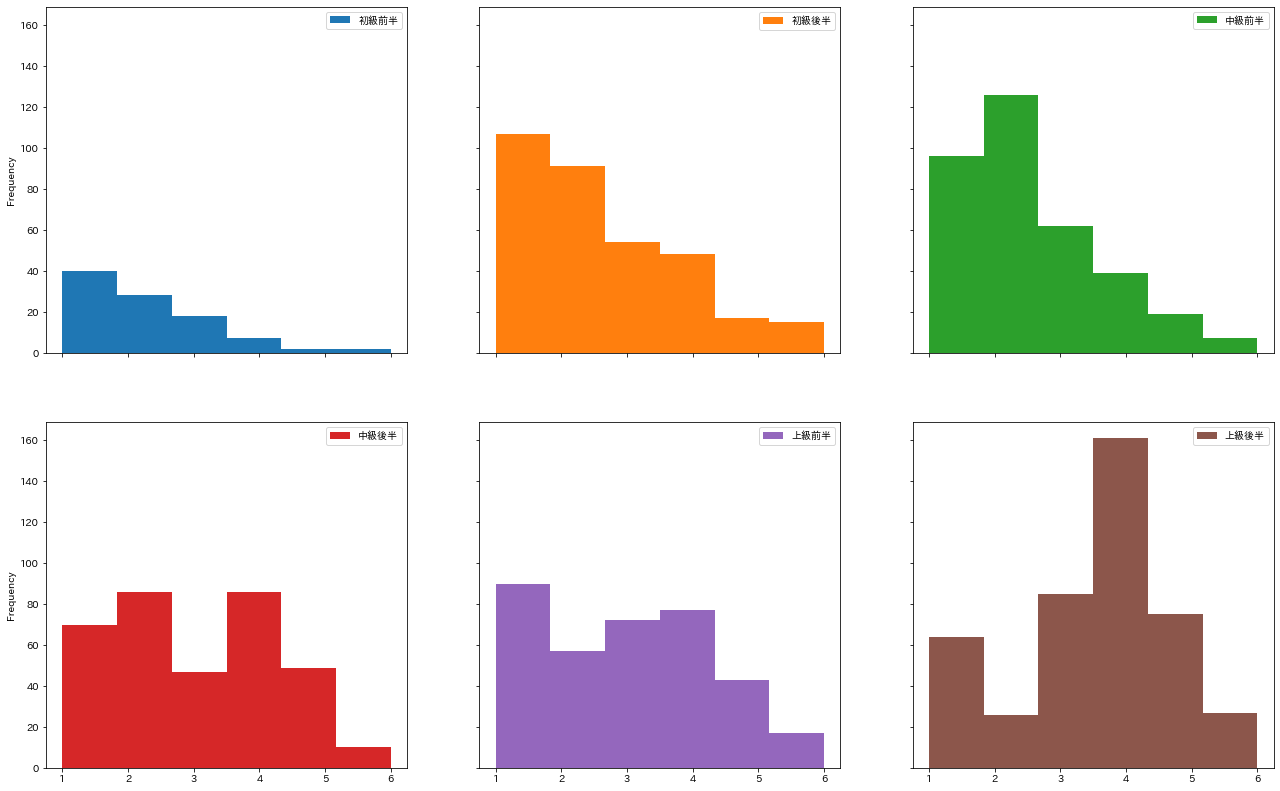

In [4]:
df.plot(kind='hist', subplots=True, layout=(2,3), bins=6, figsize=(22, 14), sharey=True, density=False)

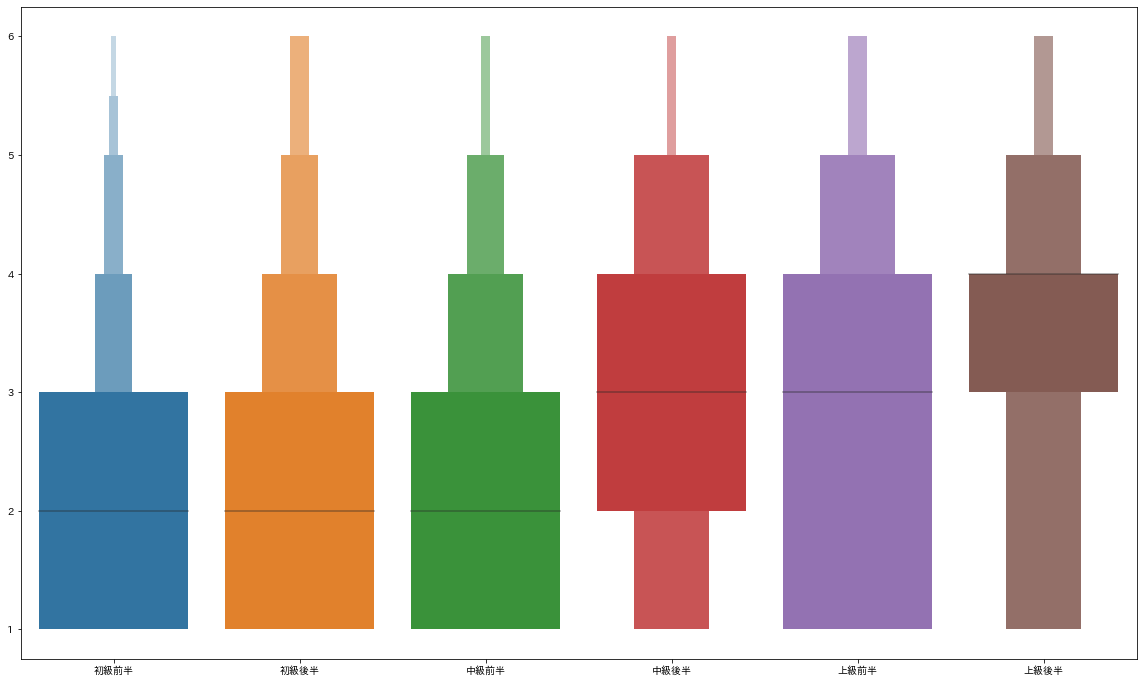

In [5]:
plt.figure(figsize=(20,12))
sns.boxenplot(data=df)
# sns.violinplot(data=df)

```
python3 -m jatr < data/サンプルテキスト/初級前半.txt 
文章全体
文数: 23
1文あたりの文字数: 12.782608695652174
1文あたりの単語数: 8.08695652173913
文字数: 294
単語数: 186
マッチした単語数: 97
語彙の難易度
平均値: 2.0618556701030926
最大値: 6
中央値: 2
最頻値: 1
標準偏差: 1.188612925760621
分散: 1.4128006872852235

python3 -m jatr < data/サンプルテキスト/初級後半.txt 
文章全体
文数: 35
1文あたりの文字数: 24.62857142857143
1文あたりの単語数: 15.771428571428572
文字数: 862
単語数: 552
マッチした単語数: 332
語彙の難易度
平均値: 2.463855421686747
最大値: 6
中央値: 2.0
最頻値: 1
標準偏差: 1.4275729568080895
分散: 2.0379645470097913

python3 -m jatr < data/サンプルテキスト/中級前半.txt 
文章全体
文数: 30
1文あたりの文字数: 31.466666666666665
1文あたりの単語数: 19.033333333333335
文字数: 944
単語数: 571
マッチした単語数: 349
語彙の難易度
平均値: 2.3696275071633237
最大値: 6
中央値: 2
最頻値: 2
標準偏差: 1.2563837583344903
分散: 1.578500148206699

python3 -m jatr < data/サンプルテキスト/中級後半.txt 
文章全体
文数: 19
1文あたりの文字数: 40.36842105263158
1文あたりの単語数: 25.68421052631579
文字数: 767
単語数: 488
マッチした単語数: 348
語彙の難易度
平均値: 2.9655172413793105
最大値: 6
中央値: 3.0
最頻値: nan
標準偏差: 1.4579467292764607
分散: 2.12560866540793

python3 -m jatr < data/サンプルテキスト/上級前半.txt 
文章全体
文数: 18
1文あたりの文字数: 51.05555555555556
1文あたりの単語数: 31.72222222222222
文字数: 919
単語数: 571
マッチした単語数: 356
語彙の難易度
平均値: 2.9353932584269664
最大値: 6
中央値: 3.0
最頻値: 1
標準偏差: 1.51751654509283
分散: 2.3028564646304797

python3 -m jatr < data/サンプルテキスト/上級後半.txt 
文章全体
文数: 17
1文あたりの文字数: 63.05882352941177
1文あたりの単語数: 38.0
文字数: 1072
単語数: 646
マッチした単語数: 438
語彙の難易度
平均値: 3.5433789954337898
最大値: 6
中央値: 4.0
最頻値: 4
標準偏差: 1.400127322656526
分散: 1.9603565196493318
```

## 参考サイト

- [日本語教育語彙表](https://jreadability.net/jev/)
- [jReadability](https://jreadability.net/sys/)